# Lab 03 - Introduction

Author: Gary Marigliano, based on the work of Hector Satizabal

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2018: Gary Marigliano (<a href="mailto:gary.marigliano@heig-vd.ch">gary.marigliano@heig-vd.ch</a>)
- Assistant 2019: Diogo Leite (<a href="mailto:diogo.leite@heig-vd.ch">diogo.leite@heig-vd.ch</a>)

Date: Winter 2019

The goal of this lab is to show you all the internal parts of a FIS (Fuzzy Inference System). 

## How to build a FIS ?

To build a FIS the following **steps** are required:

* Step 1: Transform problem/dataset's variables into fuzzy variables that we call here **linguistic variables**.
  * Definition: A linguistic variables is composed of a **name** (e.g. "Temperature") and a set of **linguistic values** (e.g. "cold", "warm", "hot"). See Figure 1.
  * Definition: A linguistic value is composed of a **name** (e.g. "warm") and a membership function (e.g. _see Figure 2_)
* Step 2: Use one or more linguistic variables to create a **fuzzy rule**
  * Definition: In plain english, a fuzzy rule can be something expressed like this: _IF "Temperature" is "cold" AND "Sunshine" is "sunny" THEN "Tourists" is "HIGH"_. Indeed, a fuzzy rule is composed of one or more **antecedents** (the part(s) before the THEN), one or more **consequents** (the part(s) after the THEN). The "AND" part of the fuzzy rule is called a **fuzzy operator**. Its role is to combine the antecedents to activate/trigger the consequents. We can use AND or OR operators (see next notebooks for details).
    * Definition: An antecendent is composed of a linguistic variable value (e.g. "cold" from linguistic variable "Temperature"). An antecendent can be set to NOT e.g. "Temperature" is NOT "cold". A consequents is like an antecedent but, in general it doesn't make sense to make it a NOT.
* Step 3: Use one or more fuzzy rules to create a **FIS**. See example in Figure 3
  * Definition: A FIS has a **type**
    - **Mamdani**: let's say it is the basic one. Both the antecedents and consequents use fuzzy sets.
    - **TSK**: the consequents are functions (usually linear ones). Pros: better accuracy the Mamdani. Cons: less interpretable.
    - **Singleton**: the consequents are constants values (i.e. fuzzy sets that concentrate its membership values into a single point of the universe). Pros: fast to compute, accuracy trade-off between Mamdani and TSK. Cons: ?.
  * Definition: A FIS can have a **default rule** i.e. a fuzzy rule that has no antecedent (e.g. _THEN Tourists is LOW_) that ensure that at least one fuzzy rule is activated for any given input.

<img src="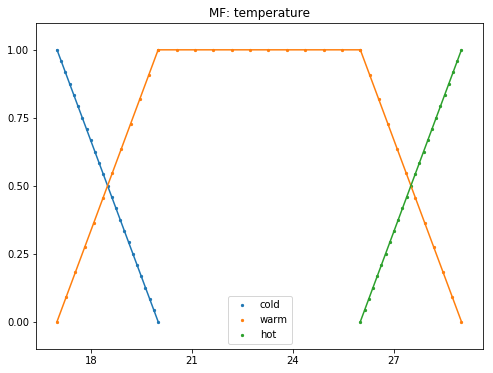
">

<div style="float: right">_Figure 1_</div>

<img src="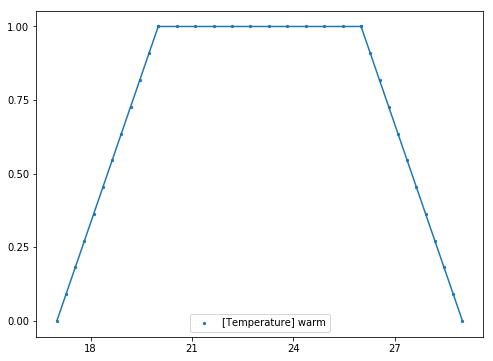
">

<div style="float: right">_Figure 2_</div>

<img src="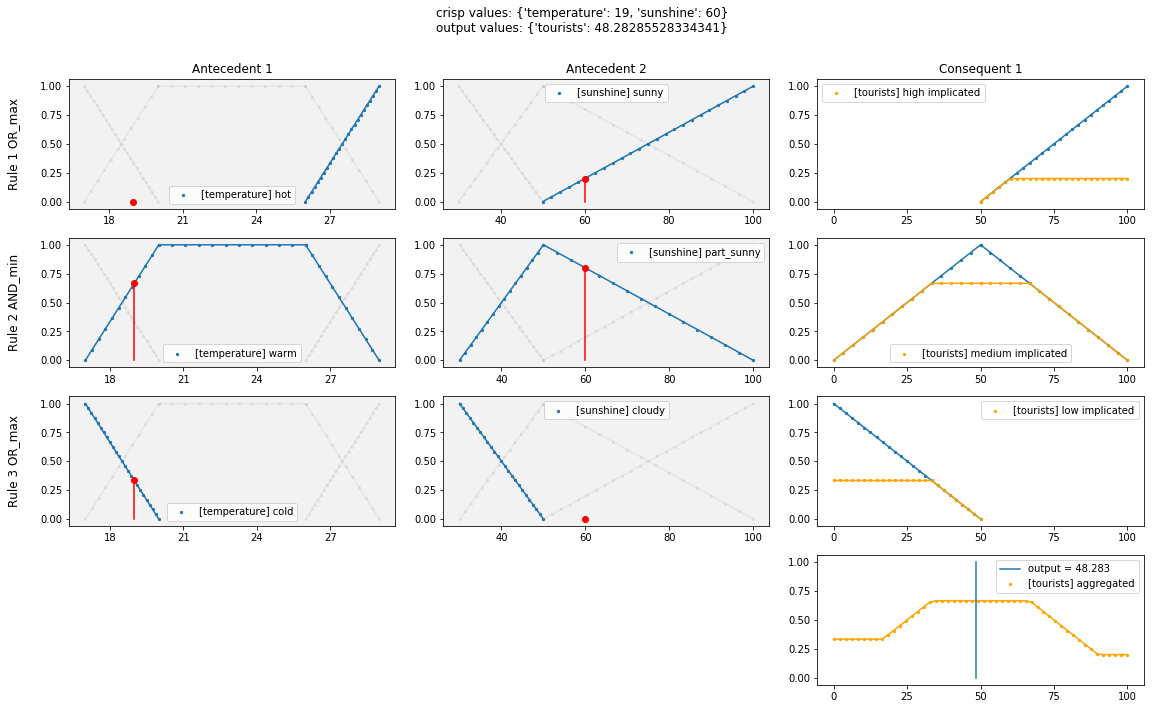
">

<div style="float: right">_Figure 3_</div>

**TODO student** 

 * What kind of type is the FIS shown in Figure 3 ? <br>
 **Mamdani**
 * Is there a default rule in this same FIS ? <br>
 ??
 * Write in plain text (french or english) how this same FIS's rule behave.
Variables:

temperature: {hot, warm, cold} <br>
sunshine: {sunny, part_sunny, cloudy} <br>

Output:
tourist: {high, medium, low}

> rule 1: IF temperature is hot OR sunshine is sunny THEN tourist is high

> rule 2: IF temperature is warm AND sunshine is part_sunny THEN tourist is medium

> rule 3: IF temperature is cold OR sunshine is cloudy THEN tourist is low


## How to "run" a FIS ? aka the fuzzy inference process

Definition: The fuzzy inference process is the "execution" that will output a prediction/result given some inputs. For example, in the Tourist Problem, we give the Temperature and the Sunshine input variables and the FIS will output the expected Tourists.

The main steps of the fuzzy inference process:

1. Fuzzification
    * We already know this step. Given a crisp input value (e.g. Temperature = 19°C) the fuzzification returns a fuzzy value (a number between 0 and 1) i.e. $\mu_{warm}(19) = 0.67$ or $\mu_{partSunny}(60) = 0.8$. Example: see Figure 4
2. Implication (also called rules activation)
    * For each fuzzy rule compute its activation. This happens in two sub-steps (let's imagine the following rule _IF "Temperature" is "warm" AND "Sunshine" is "partSunny" THEN "Tourists" is "medium"_)
        1. **Activate** the antecedents i.e. apply the fuzzy operators between each antecedents. In our example rule, let's assume that AND is the fuzzy operator min(): $\mu_{rule2} = min(\mu_{warm}(19), \mu_{partSunny}(60)) = min(0.67, 0.8) = 0.67$ So antecedents activation for this rule is 0.67. More details about the fuzzy operators in the next notebook.
        2. The second sub-step is to apply the rule activation to the consequents. This sub-step is called **implication**. The implication is done by applying a function between the consequent(s) and the activation value i.e. $consequent_{implicated} = f(\mu_{rule2}, consequent)$. In general the implication function $f$ is the min() function. See Figure 3, rule 2 for an example.
   * So, as an output of the Implication step you have either "truncated" (due to the last min() function membership functions (the orange ones in Figure 3) in the case of a Mamdani FIS or you will have "truncated" single values in the case of a Singleton FIS.
3. Aggregation
    * The aggregation is the part where we merge the activated rules i.e. all implicated consequents to produce a new membership function (in Figure 3 4th row, 3rd column). Generally, we use the max() function as the aggregation function e.g. $max(implConsRule1,implConsRule2, implConsRule3)$ where $implConsX$ is the implicated consequent of the rule X. 
    * So, as an output of the Aggregation step you have a new membership function (one per consequent) that is built using each rule's activation as we can see in Figure 3 4th row, 3rd column
4. Defuzzification
    * The goal of this step to convert the aggregated fuzzy set(s) into crisp value(s). To do so we apply a defuzzification function, generally COA (Center of Area) or MOM (Mean of Maxima). Implementation details in section 1.2.3.3 of Carlos Pena's thesis.

<img src="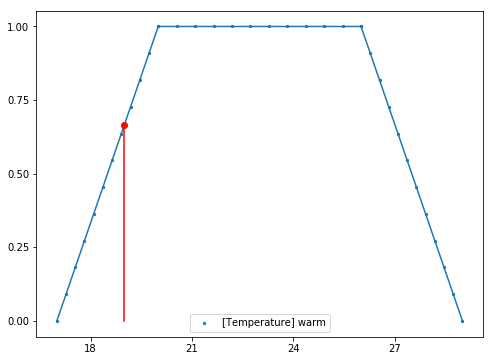
">

<div style="float: right">_Figure 4_</div>

**TODO student** Read this. What follow is mainly based on this document: 

* https://ch.mathworks.com/help/fuzzy/fuzzy-inference-process.html

Note: the vocabulary may not be the same but the main ideas are.